# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Furkan Kurt
# Student ID: 2210765005

In [65]:
# imports
import sqlite3
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck!

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

| Customers   | Type/Constraints  |
|-------------|-------------------|
| customerID  | PK, int           |
| fullName    | VARCHAR(250)      |
| e_mail      | VARCHAR(250)      |
| phoneNumber | VARCHAR(11)       |

| Airlines   | Type/Constraints  |
|------------|-------------------|
| airlineID  | PK, int           |
| airlineName| VARCHAR(250)      |

| Flights       | Type/Constraints            |
|---------------|-----------------------------|
| flightID      | PK, int                     |
| departureCity | VARCHAR(250)                |
| arrivalCity   | VARCHAR(250)                |
| airlineID     | INTEGER, FK REFERENCES Airlines(airlineID) |
| flightDate    | DATE                        |

| Hotels     | Type/Constraints  |
|------------|-------------------|
| hotelID    | PK, int           |
| hotelName  | VARCHAR(250)      |
| location   | VARCHAR(250)      |
| rating     | INTEGER           |

| Feedbacks     | Type/Constraints                        |
|---------------|------------------------------------------|
| feedbackID    | PK, int                                  |
| customerID    | INTEGER, FK REFERENCES Customers(customerID) |
| airlineID     | INTEGER, FK REFERENCES Airlines(airlineID) |
| hotelID       | INTEGER, FK REFERENCES Hotels(hotelID)    |
| feedback_text | VARCHAR(250)                             |

| Bookings   | Type/Constraints                  |
|------------|-----------------------------------|
| bookingID  | PK, int                           |
| customerID | INTEGER, FK REFERENCES Customers(customerID) |


| FlightBookings    | Type/Constraints                        |
|-------------------|------------------------------------------|
| flight_booking_ID | PK, int                                  |
| bookingID         | INTEGER, FK REFERENCES Bookings(bookingID) |
| flightID          | INTEGER, FK REFERENCES Flights(flightID) |


| HotelBookings    | Type/Constraints                        |
|------------------|------------------------------------------|
| hotel_booking_ID | PK, int                                  |
| bookingID        | INTEGER, FK REFERENCES Bookings(bookingID) |
| hotelID          | INTEGER, FK REFERENCES Hotels(hotelID)    |



In [66]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()

# Customer's table
cursor.execute('''
CREATE TABLE Customers (
    customerID INTEGER PRIMARY KEY,
    fullName VARCHAR(250),
    e_mail VARCHAR(250),
    phoneNumber VARCHAR(11)
)
''')


# Airlines Table
cursor.execute('''
CREATE TABLE Airlines (
    airlineID INTEGER PRIMARY KEY,
    airlineName VARCHAR(250)
)
''')

# Flights Table
cursor.execute('''
CREATE TABLE Flights (
    flightID INTEGER PRIMARY KEY,
    departureCity VARCHAR(250),
    arrivalCity VARCHAR(250),
    airlineID INTEGER,
    flightDate DATE,
    FOREIGN KEY (airlineID) REFERENCES Airlines(airlineID)
)
''')

# Hotels Table
cursor.execute('''
CREATE TABLE Hotels (
    hotelID INTEGER PRIMARY KEY,
    hotelName VARCHAR(250),
    location VARCHAR(250),
    rating INTEGER
)
''')


# Bookings Table
cursor.execute('''
CREATE TABLE Bookings (
    bookingID INTEGER PRIMARY KEY,
    customerID INTEGER,
    FOREIGN KEY (customerID) REFERENCES Customers(customerID)
)
''')


# FlightBookings Table
cursor.execute('''
CREATE TABLE FlightBookings (
    flight_booking_ID INTEGER PRIMARY KEY,
    bookingID INTEGER,
    flightID INTEGER,
    FOREIGN KEY (bookingID) REFERENCES Bookings(bookingID),
    FOREIGN KEY (flightID) REFERENCES Flights(flightID)
)
''')


# HotelBookings Table
cursor.execute('''
CREATE TABLE HotelBookings (
    hotel_booking_ID INTEGER PRIMARY KEY,
    bookingID INTEGER,
    hotelID INTEGER,
    FOREIGN KEY (bookingID) REFERENCES Bookings(bookingID),
    FOREIGN KEY (hotelID) REFERENCES Hotels(hotelID)
)
''')


# Feedbacks Table
cursor.execute('''
CREATE TABLE Feedbacks (
    feedbackID INTEGER PRIMARY KEY,
    customerID INTEGER,
    airlineID INTEGER,
    hotelID INTEGER,
    feedback_text VARCHAR(250),
    FOREIGN KEY (customerID) REFERENCES Customers(customerID),
    FOREIGN KEY (airlineID) REFERENCES Airlines(airlineID),
    FOREIGN KEY (hotelID) REFERENCES Hotels(hotelID)
)
''')

In [52]:
df = pd.read_csv('BookingDetails.csv')
df2 = pd.read_csv('FeedbackDetails.csv')

df[['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']].to_sql('Customers', conn, if_exists='replace', index=False)
df[['AirlineID', 'AirlineName']].to_sql('Airlines', conn, if_exists='replace', index=False)
df[['FlightID', 'Flight_Departure', 'Flight_Destination', 'Flight_Date','AirlineID']].to_sql('Flights', conn, if_exists='replace', index=False)
df[['HotelID', 'HotelName', 'HotelLocation', 'HotelRating']].to_sql('Hotels', conn, if_exists='replace', index=False)
df[['BookingID', 'CustomerID']].to_sql('Bookings', conn, if_exists='replace', index=False)
df[['BookingID', 'FlightID']].to_sql('FlightBookings', conn, if_exists='replace', index=False)
df[['BookingID', 'HotelID']].to_sql('HotelBookings', conn, if_exists='replace', index=False)
df2[['FeedbackID', 'CustomerID', 'AirlineID', 'HotelID','Review']].to_sql('Feedbacks', conn, if_exists='replace', index=False)

conn.commit()
conn.close()


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [84]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()

query = '''
SELECT
    Hotels.hotelName,
    COUNT(DISTINCT HotelBookings.bookingID) AS TotalBookings
FROM
    Hotels
LEFT JOIN
    HotelBookings ON Hotels.hotelID = HotelBookings.hotelID
GROUP BY
    Hotels.hotelID, Hotels.hotelName;



'''
cursor.execute(query)

results = cursor.fetchall()

filtered_results = [line for line in results if line[0] is not None]
column_names = ['HotelName', 'NumberOfBookings']
df = pd.DataFrame(filtered_results, columns=column_names)
print(df)

conn.close()

            HotelName  NumberOfBookings
0          Opal Motel                11
1       Diamond Plaza                 6
2       Golden Suites                16
3        Silver Villa                10
4       Emerald Motel                15
5      Sapphire Villa                14
6          Jade Motel                 5
7         Jade Suites                 7
8        Pearl Resort                12
9      Emerald Resort                 9
10         Golden Inn                14
11        Jade Resort                11
12      Silver Palace                 8
13      Silver Resort                15
14      Diamond Villa                10
15     Sapphire Villa                 8
16     Diamond Resort                15
17     Pearl Hideaway                 8
18        Opal Suites                 9
19     Golden Retreat                 7
20         Opal Plaza                10
21      Ruby Hideaway                 8
22           Opal Inn                 4
23        Diamond Inn                14


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [85]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()
query = '''
WITH ClientFeedbacks AS (
    SELECT
        Customers.CustomerName,
        Customers.CustomerPhone,
        Customers.CustomerEmail,
        Feedbacks.airlineID IS NOT NULL AS HasFlightFeedback,
        Feedbacks.hotelID IS NOT NULL AS HasHotelFeedback
    FROM Customers
    JOIN Feedbacks ON Customers.customerID = Feedbacks.customerID
    WHERE Feedbacks.airlineID IS NOT NULL OR Feedbacks.hotelID IS NOT NULL
)
SELECT
    CustomerName,
    CustomerPhone,
    CustomerEmail
FROM ClientFeedbacks
GROUP BY
    CustomerName, CustomerPhone, CustomerEmail
HAVING
    COUNT(DISTINCT HasFlightFeedback) > 0
    AND COUNT(DISTINCT HasHotelFeedback) > 0;

'''

cursor.execute(query)
results = cursor.fetchall()



column_names = ['CustomerName', 'CustomerPhone', 'CustomerEmail']
df = pd.DataFrame(results, columns=column_names)
print("Customers with Feedback for Both Flights and Hotels:")
print(df)
conn.close()

Customers with Feedback for Both Flights and Hotels:
        CustomerName CustomerPhone             CustomerEmail
0          Ava Brown   555-3207593        ava.brown@mail.com
1          Ava Brown   555-5172056        ava.brown@mail.com
2          Ava Brown   555-7394791        ava.brown@mail.com
3          Ava Davis   555-4376898        ava.davis@mail.com
4         Ava Garcia   555-3577079       ava.garcia@mail.com
..               ...           ...                       ...
356     Sophia Smith   555-3170326     sophia.smith@mail.com
357     Sophia Smith   555-4984598     sophia.smith@mail.com
358     Sophia Smith   555-6604676     sophia.smith@mail.com
359  Sophia Williams   555-2266084  sophia.williams@mail.com
360  Sophia Williams   555-3522474  sophia.williams@mail.com

[361 rows x 3 columns]


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [87]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()

query = '''
SELECT
    Hotels.hotelName,
    Hotels.hotelrating AS HotelRating
FROM
    Hotels
WHERE hotelrating < (SELECT AVG(hotelrating) FROM Hotels)
'''
cursor.execute(query)
results = cursor.fetchall()

column_names = ['HotelName', 'HotelRating']
df = pd.DataFrame(results, columns=column_names)
print("Hotels with Ratings Below Average:")
print(df)

conn.close()


Hotels with Ratings Below Average:
         HotelName  HotelRating
0     Pearl Resort          2.0
1    Golden Resort          3.0
2      Ruby Palace          1.0
3    Golden Resort          1.0
4     Golden Villa          3.0
..             ...          ...
233     Opal Motel          1.0
234     Opal Plaza          2.0
235    Diamond Inn          2.0
236    Diamond Inn          2.0
237  Golden Resort          1.0

[238 rows x 2 columns]


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [75]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()
query = '''
SELECT
    C.customerID,
    C.customerName AS CustomerName,
    COUNT(DISTINCT HB.hotelID) AS NumberOfDifferentHotels,
    COUNT(DISTINCT F.airlineID) AS NumberOfDifferentAirlines,
    COUNT(DISTINCT B.bookingID) AS TotalBookings
FROM
    Customers C
JOIN
    Bookings B ON C.customerID = B.customerID
LEFT JOIN
    HotelBookings HB ON B.bookingID = HB.bookingID
LEFT JOIN
    FlightBookings FB ON B.bookingID = FB.bookingID
LEFT JOIN
    Flights F ON FB.flightID = F.flightID
GROUP BY
    C.customerID, C.customerName
HAVING
    NumberOfDifferentHotels >= 3
    AND NumberOfDifferentAirlines >= 2;
'''

results = pd.read_sql_query(query, conn)
print(results)
conn.close()


Empty DataFrame
Columns: [CustomerID, CustomerName, NumberOfDifferentHotels, NumberOfDifferentAirlines, TotalBookings]
Index: []


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this)

In [88]:
conn = sqlite3.connect('SkywardCompany0123.db')
cursor = conn.cursor()

query_flights = '''
SELECT DISTINCT Customers.CustomerName, Customers.CustomerPhone
FROM Customers
JOIN Feedbacks ON Customers.customerID = Feedbacks.customerID
WHERE Feedbacks.airlineID IS NOT NULL
'''

query_hotels = '''
SELECT DISTINCT Customers.CustomerName, Customers.CustomerPhone
FROM Customers
JOIN Feedbacks ON Customers.customerID = Feedbacks.customerID
WHERE Feedbacks.hotelID IS NOT NULL
'''

cursor.execute(query_flights)
result_flights = cursor.fetchall()

cursor.execute(query_hotels)
result_hotels = cursor.fetchall()


column_names = ['CustomerName', 'CustomerPhone']
df_flights = pd.DataFrame(result_flights, columns=column_names)
df_hotels = pd.DataFrame(result_hotels, columns=column_names)
print("Flight Feedback:")
print(df_flights)

print("\nHotel Feedback:")
print(df_hotels)
conn.close()


Flight Feedback:
         CustomerName CustomerPhone
0    Sophia Rodriguez   555-7717570
1          Emma Smith   555-1197491
2         Liam Garcia   555-5055399
3           Ava Jones   555-2606180
4        Logan Garcia   555-8723852
..                ...           ...
234         Mia Jones   555-3333692
235        Liam Jones   555-3294076
236     Sophia Garcia   555-1797618
237        Mia Garcia   555-3314420
238   Sophia Martinez   555-0487272

[239 rows x 2 columns]

Hotel Feedback:
        CustomerName CustomerPhone
0       Ethan Miller   555-7366655
1       Mia Williams   555-4798996
2         Liam Brown   555-3328325
3        Ethan Jones   555-0003961
4    Mason Rodriguez   555-5398233
..               ...           ...
226      Mason Brown   555-3196635
227       John Davis   555-7743670
228     Mason Miller   555-1990386
229      Emma Miller   555-4005422
230   John Rodriguez   555-5538292

[231 rows x 2 columns]


# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [77]:
titanicData = pd.read_csv('titanic.csv')
pivot_table = pd.pivot_table(titanicData, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


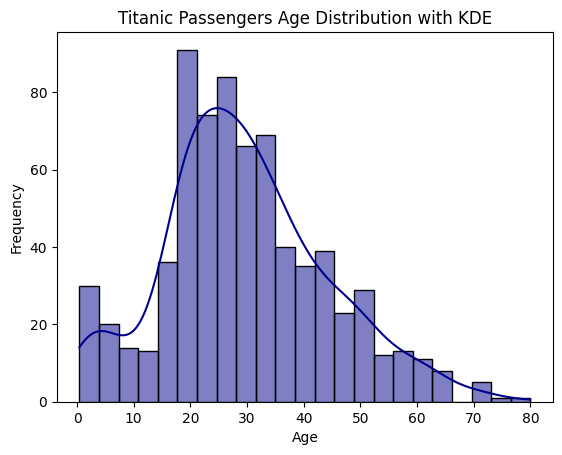

In [78]:
ageData = titanicData['Age'].dropna()
sns.histplot(ageData, bins=23, kde=True, color='darkblue')
plt.title('Titanic Passengers Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

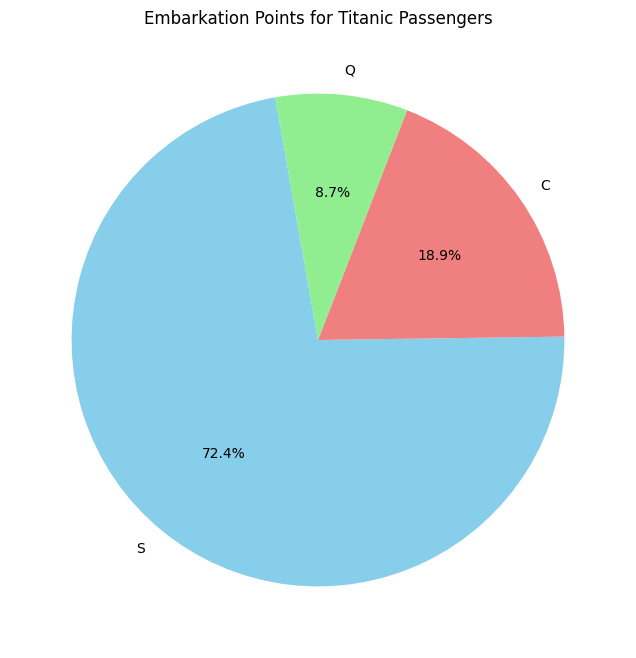

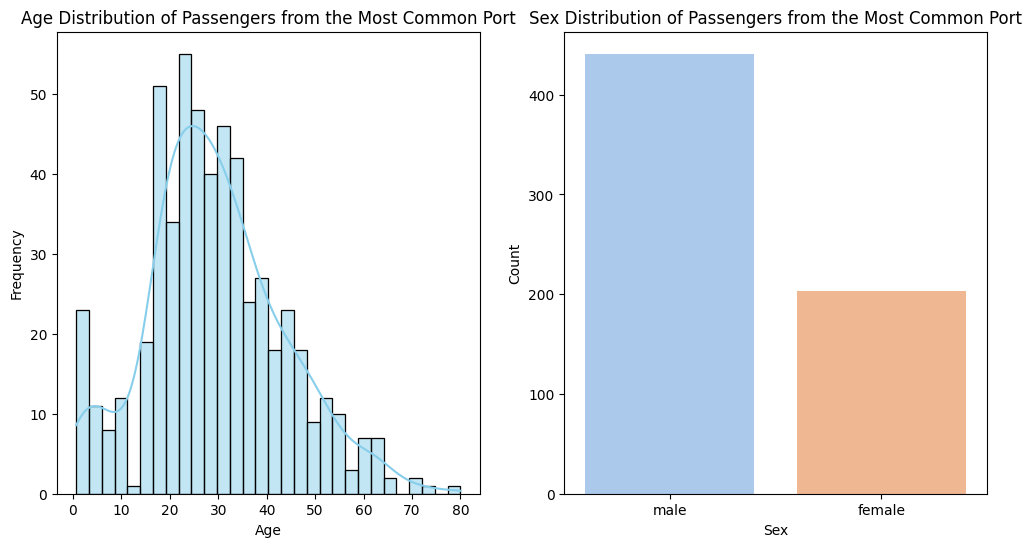

In [79]:
embarkation_counts = titanicData['Embarked'].value_counts()
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(embarkation_counts, labels=embarkation_counts.index, autopct='%1.1f%%', startangle=100, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Embarkation Points for Titanic Passengers')
plt.show()
most_common_port = embarkation_counts.idxmax()
most_common_port_passengers = titanicData[titanicData['Embarked'] == most_common_port]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(most_common_port_passengers['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers from the Most Common Port')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=most_common_port_passengers, palette='pastel')
plt.title('Sex Distribution of Passengers from the Most Common Port')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

"""In the pie chart,
we see that the most boarded port is port s, so we will process the boarding passengers in this port.
"""
""" Since the part of the age range we see in the chart is between 20 and 40,
the child part is smaller than that and since the number of men is more dominant in the chart made for men and women,
it can be said that it does not comply with the child-woman policy for port s.
"""

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

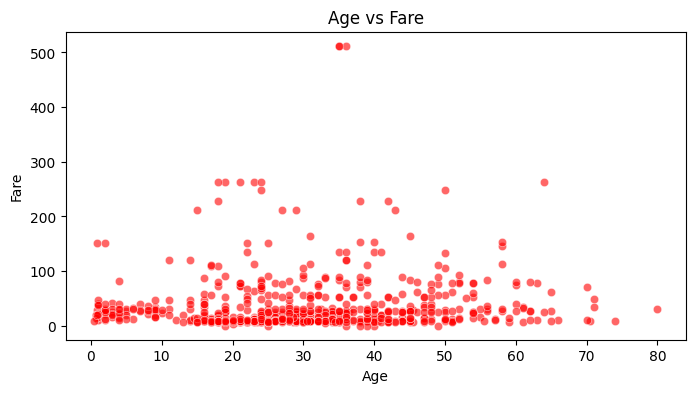

In [80]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Fare', data=titanicData, alpha=0.6, color='red')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Most of the data we have is between 0-100, even closer to 0, but there is also a small amount of data between 100-200, 200-300 and so on. I couldn't find a connection about age vs mouse because there is no ratio between age ranges and ticket prices.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


<ipython-input-89-994c6c8d24c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = titanicData.groupby(['Embarked', 'Pclass']).mean().reset_index()


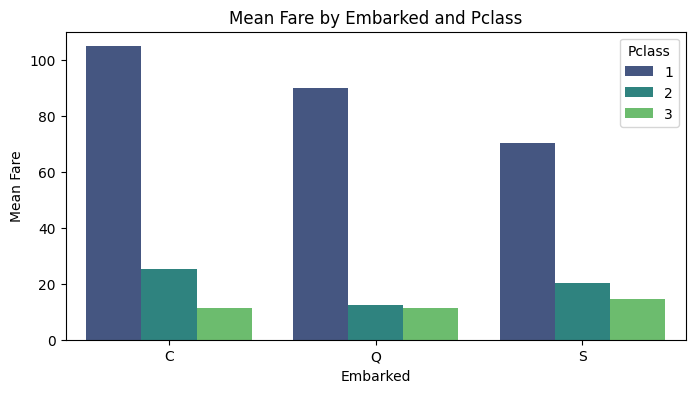

In [89]:
grouped_df = titanicData.groupby(['Embarked', 'Pclass']).mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=grouped_df, palette='viridis')
plt.xlabel('Embarked')
plt.ylabel('Mean Fare')
plt.title('Mean Fare by Embarked and Pclass')
plt.show()


We see that class 1 is of high value in every port. We see that it is most expensive in port C.
---



# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism.
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty.

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording.
